In [ ]:
# code below taken from Chris Yogozinski / Josh Stramers "statquest pca"

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#creating sample data set
genes = ['gene' + str(i) for i in range(1, 101)] #create fake gene names
wt = ['wt' + str(i) for i in range(1,6)] #wild type genes
ko = ['ko' + str(i) for i in range(1,6)] #knock out genes

In [3]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size= 5)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,256,285,260,228,280,281,254,219,231,238
gene2,9,16,18,12,20,850,780,805,862,844
gene3,181,189,172,190,177,642,686,655,637,705
gene4,266,264,303,282,265,631,627,685,659,682
gene5,521,527,491,518,548,233,277,256,276,250


In [8]:
data.shape

(100, 10)

In [9]:
scaled_data = preprocessing.scale(data.T) #transpose data to have samples in the rows
#StandardScaler().fit_transform(data.T)

In [10]:
pca = PCA()

In [11]:
pca.fit(scaled_data)

PCA()

In [12]:
pca_data = pca.transform(scaled_data)

In [14]:
#for plotting
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

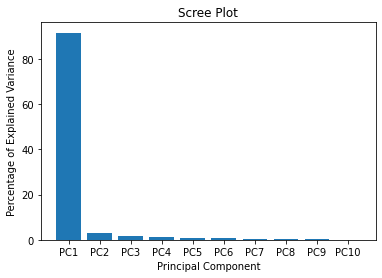

In [15]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [16]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

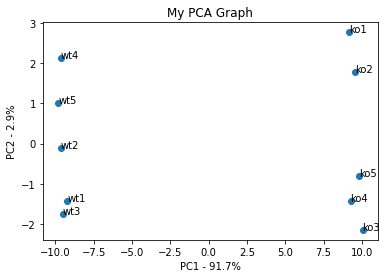

In [17]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [18]:
loading_scores = pd.Series(pca.components_[0], index = genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene60    0.104381
gene70    0.104379
gene43    0.104372
gene75    0.104363
gene99   -0.104321
gene17    0.104319
gene11   -0.104312
gene45   -0.104308
gene89   -0.104297
gene53   -0.104296
dtype: float64
